In [1]:
import pandas as pd
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder = 'simulation_num_uavs'
file = glob.glob(str(folder+'/'+'*.txt'))
df = pd.read_csv(file[0], delimiter = ",")

In [3]:
df.head()

,exec_time,NUM_UAVS,MODE,ALWAYS_COMMUNICATION,total_iter,total_cov_area,average_inst_cov_area,mission_time
0,39.49,2,continuous,False,350,95.08,6.18,70.0
1,44.70,2,continuous,False,350,95.00,6.16,70.0
2,54.90,2,continuous,False,466,95.12,6.20,93.2
3,53.56,2,continuous,False,437,95.08,6.14,87.4
4,33.61,2,continuous,False,319,95.16,6.10,63.8


In [4]:
average = df.groupby('NUM_UAVS').mean()
average

,exec_time,ALWAYS_COMMUNICATION,total_iter,total_cov_area,average_inst_cov_area,mission_time
NUM_UAVS,,,,,,
2,45.510,False,391.1,95.060,6.156,78.22
3,46.037,False,245.7,95.068,9.049,49.14
4,46.796,False,187.0,95.028,11.929,37.40
5,51.263,False,148.1,95.100,14.516,29.62
6,57.144,False,126.0,95.068,17.015,25.20
7,59.614,False,99.4,95.144,19.190,19.88
8,67.347,False,89.6,95.080,21.225,17.92
9,80.978,False,81.9,95.112,23.074,16.38
10,91.901,False,76.5,95.108,25.272,15.30


/home/miquel/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


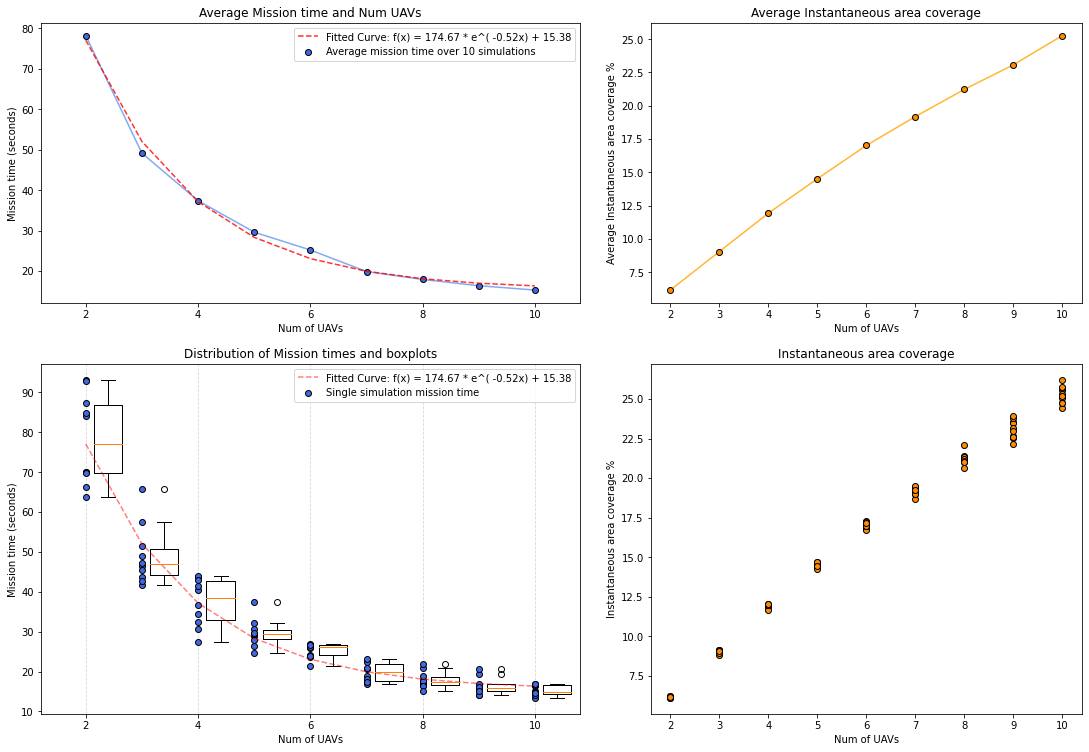

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 11),
                        gridspec_kw={'height_ratios': [4, 5], 'width_ratios': [5,4]})
fig.tight_layout(pad=4.0)

# Mission time plot - averages
axs[0][0].set_title("Average Mission time and Num UAVs")
axs[0][0].set_xlabel("Num of UAVs")
axs[0][0].set_ylabel("Mission time (seconds)")
axs[0][0].scatter(average.index, average['mission_time'],
                  color='royalblue', alpha=1, edgecolor='black', zorder=2,
                  label='Average mission time over 10 simulations')
axs[0][0].plot(average.index, average['mission_time'], color='cornflowerblue', alpha=0.8, zorder=1)

X = list(map(lambda i:[i], average.index))
y = list(map(lambda i:[i], average['mission_time']))
min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

# poly_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
# reg = LinearRegression().fit(poly_X, y)
# line = np.linspace(min_x - 0.05 * diff_x, max_x + 0.05 * diff_x).reshape(-1, 1)
# xs = PolynomialFeatures(degree=2, include_bias=False).fit_transform(line)
# ys = reg.predict(xs)
# axs[0][0].plot(xs[:,0], ys, color='red', linestyle='--', alpha=0.8,
#                label="Tendency line (Polynomial Regression 2º degree)")

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x = np.array(average.index, dtype=np.float64)
y = np.array(average['mission_time'], dtype=np.float64)
popt, pcov = curve_fit(func, x, y)
axs[0][0].plot(x, func(x, *popt), color='red', linestyle='--', alpha=0.8,
               label=str("Fitted Curve: f(x) = "+str(popt[0].round(2))+' * e^('+' -'+str(popt[1].round(2))+
                         'x) + '+str(popt[2].round(2))))

axs[0][0].set_xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
axs[0][0].legend()


# Avg instantaneous coverage plot - averages
axs[0][1].set_title("Average Instantaneous area coverage")
axs[0][1].set_xlabel("Num of UAVs")
axs[0][1].set_ylabel("Average Instantaneous area coverage %")
axs[0][1].scatter(average.index, average['average_inst_cov_area'], color='darkorange', alpha=1, edgecolor='black', zorder=2)
axs[0][1].plot(average.index, average['average_inst_cov_area'], color='orange', alpha=0.8, zorder=1)

# Mission time plot - samples distribution - boxplots
axs[1][0].set_title("Distribution of Mission times and boxplots")
axs[1][0].set_xlabel("Num of UAVs")
axs[1][0].set_ylabel("Mission time (seconds)")
data = list(df.groupby('NUM_UAVS')['mission_time'].apply(list))
data.insert(0,[])
axs[1][0].boxplot(data, positions=list(np.arange(1.4,11.4,1.0)), manage_ticks=False)
axs[1][0].scatter(df['NUM_UAVS'], df['mission_time'], color='royalblue', alpha=1,
                  edgecolor='black', zorder=2, label="Single simulation mission time")
axs[1][0].grid(axis='x', linestyle='--', alpha=0.5)
# axs[1][0].plot(xs[:,0], ys, color='red', linestyle='--', alpha=0.25,
#                label="Tendency line (Polynomial Regression 2º degree)")
axs[1][0].plot(x, func(x, *popt), color='red', linestyle='--', alpha=0.5,
               label=str("Fitted Curve: f(x) = "+str(popt[0].round(2))+' * e^('+' -'+str(popt[1].round(2))+
                         'x) + '+str(popt[2].round(2))))
axs[1][0].set_xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
axs[1][0].legend()

# Instantaneous area coverage samples distribution
axs[1][1].set_title("Instantaneous area coverage")
axs[1][1].set_xlabel("Num of UAVs")
axs[1][1].set_ylabel("Instantaneous area coverage %")
axs[1][1].scatter(df['NUM_UAVS'], df['average_inst_cov_area'], color='darkorange', alpha=1, edgecolor='black', zorder=2)

plt.savefig('fig.png', dpi=300)
plt.show()